# Doctor Visit Analysis using Python

- importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

- Reading Doctor Visit Dataset

In [2]:
df = pd.read_csv(r"C:\Users\P nageswararao\Downloads\DoctorVisits - DA.csv")

In [3]:
df.head()

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,1,female,0.19,0.55,1,4,1,yes,no,no,no,no
1,2,1,female,0.19,0.45,1,2,1,yes,no,no,no,no
2,3,1,male,0.19,0.90,3,0,0,no,no,no,no,no
3,4,1,male,0.19,0.15,1,0,0,no,no,no,no,no
4,5,1,male,0.19,0.45,2,5,1,no,no,no,yes,no


## Data Cleaning and Preprocessing

- Dropping Unnamed column 

In [4]:
df.drop('Unnamed: 0',inplace=True,axis=1)

In [5]:
df.head()

,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,female,0.19,0.55,1,4,1,yes,no,no,no,no
1,1,female,0.19,0.45,1,2,1,yes,no,no,no,no
2,1,male,0.19,0.90,3,0,0,no,no,no,no,no
3,1,male,0.19,0.15,1,0,0,no,no,no,no,no
4,1,male,0.19,0.45,2,5,1,no,no,no,yes,no


- Information about Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5190 entries, 0 to 5189
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   visits     5190 non-null   int64  
 1   gender     5190 non-null   object 
 2   age        5190 non-null   float64
 3   income     5190 non-null   float64
 4   illness    5190 non-null   int64  
 5   reduced    5190 non-null   int64  
 6   health     5190 non-null   int64  
 7   private    5190 non-null   object 
 8   freepoor   5190 non-null   object 
 9   freerepat  5190 non-null   object 
 10  nchronic   5190 non-null   object 
 11  lchronic   5190 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 486.7+ KB


- Checking for missing values

In [7]:
df.isnull().sum()

visits       0
gender       0
age          0
income       0
illness      0
reduced      0
health       0
private      0
freepoor     0
freerepat    0
nchronic     0
lchronic     0
dtype: int64

- Checking for Duplicates

In [8]:
df.duplicated().sum()

1320

- Calculating summary statistics (mean, median, standard deviation)

In [9]:
df.describe()

,visits,age,income,illness,reduced,health
count,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000
mean,0.301734,0.406385,0.583160,1.431985,0.861850,1.217534
std,0.798134,0.204782,0.368907,1.384152,2.887628,2.124266
min,0.000000,0.190000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.220000,0.250000,0.000000,0.000000,0.000000
50%,0.000000,0.320000,0.550000,1.000000,0.000000,0.000000
75%,0.000000,0.620000,0.900000,2.000000,0.000000,2.000000
max,9.000000,0.720000,1.500000,5.000000,14.000000,12.000000


- Visualising missing values using HeatMap

<AxesSubplot: >

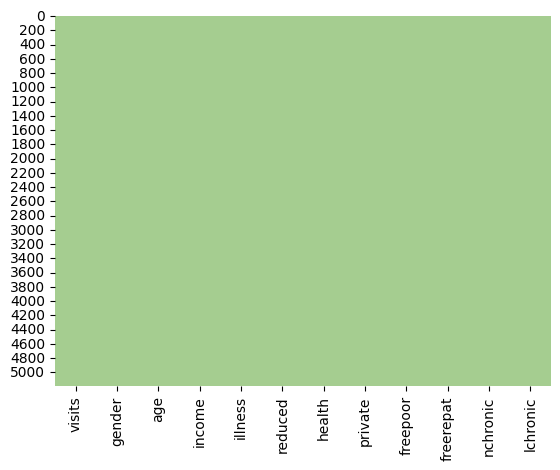

In [10]:
sns.heatmap(df.isnull(),cbar=False,cmap='crest')

- Count and Visualize the number of males and females affected by illness

In [11]:
df['gender'].value_counts()

female    2702
male      2488
Name: gender, dtype: int64

<AxesSubplot: xlabel='gender', ylabel='Count'>

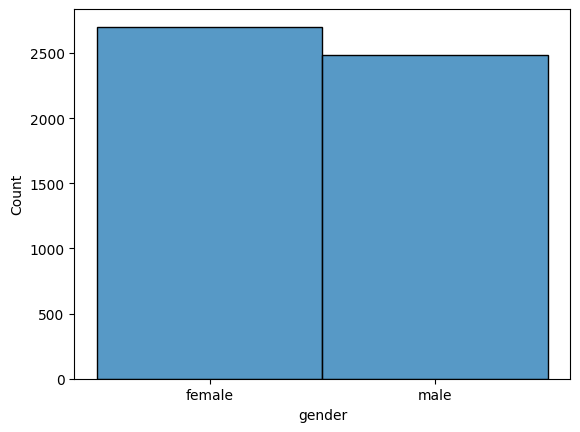

In [12]:
sns.histplot(df.gender,bins=2)

- Find out the total no. of people based on their count of illness

In [13]:
df['illness'].value_counts()

1    1638
0    1554
2     946
3     542
4     274
5     236
Name: illness, dtype: int64

In [14]:
dct = dict(df['illness'].value_counts())

<BarContainer object of 6 artists>

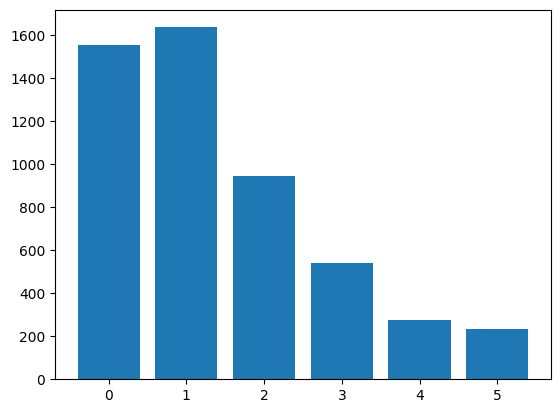

In [15]:
plt.bar(dct.keys(),dct.values())

- Visualize and analyse the maximum,minimum and medium income

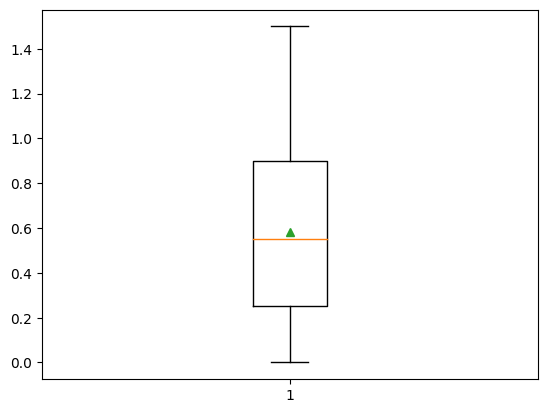

In [16]:
y = list(df.income)
plt.boxplot(y,showmeans=True)
plt.show()

- Find out the no of days of reduced activity of male and female seperatly due to illness

In [17]:
df.groupby(['gender','reduced']).mean()

C:\Users\P nageswararao\AppData\Local\Temp\ipykernel_17944\1883727358.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['gender','reduced']).mean()


visits       age    income   illness    health
gender reduced                                                  
female 0        0.229322  0.465755  0.482735  1.462144  1.115098
       1        0.400000  0.325684  0.542105  2.242105  1.610526
       2        0.672727  0.391455  0.560182  2.236364  1.781818
       3        1.333333  0.403111  0.516000  2.733333  1.733333
       4        0.851852  0.458889  0.466667  2.222222  2.074074
       5        1.444444  0.401667  0.614444  2.222222  2.500000
       6        1.363636  0.426364  0.622727  2.363636  1.363636
       7        1.384615  0.436154  0.473462  2.653846  2.230769
       8        1.090909  0.471818  0.404545  2.181818  4.000000
       9        0.500000  0.570000  0.825000  3.000000  1.000000
       10       2.142857  0.512857  0.421429  2.571429  2.000000
       12       2.000000  0.720000  0.250000  3.500000  5.500000
       13       4.000000  0.720000  0.300000  4.500000  3.500000
       14       1.543103  0.551724  0.427586  2.534483  4.112069
male   0        0.136007  0.344703  0.694398  1.099585  0.924850
       1        0.304878  0.286220  0.676341  1.743902  1.256098
       2        0.471698  0.343585  0.653019  2.358491  1.547170
       3        0.724138  0.334138  0.741379  2.137931  1.689655
       4        0.722222  0.309444  0.869444  2.055556  2.000000
       5        1.136364  0.331818  0.570455  2.272727  2.818182
       6        0.833333  0.340000  0.591667  2.500000  2.000000
       7        0.750000  0.314167  0.655000  2.583333  4.333333
       8        1.333333  0.365000  0.833333  2.666667  2.000000
       9        2.200000  0.310000  0.392000  2.400000  2.000000
       10       1.800000  0.480000  0.590000  2.600000  4.600000
       11       5.000000  0.320000  1.000000  1.500000  0.500000
       12       2.000000  0.370000  0.515000  1.500000  1.000000
       13       4.000000  0.510000  0.350000  3.333333  2.333333
       14       1.555556  0.476806  0.598611  2.375000  3.527778

- Find out the correlation between variables in the given dataset correlation between different variables

C:\Users\P nageswararao\AppData\Local\Temp\ipykernel_17944\762065390.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cbar=True,annot=True,cmap='BuPu')


<AxesSubplot: >

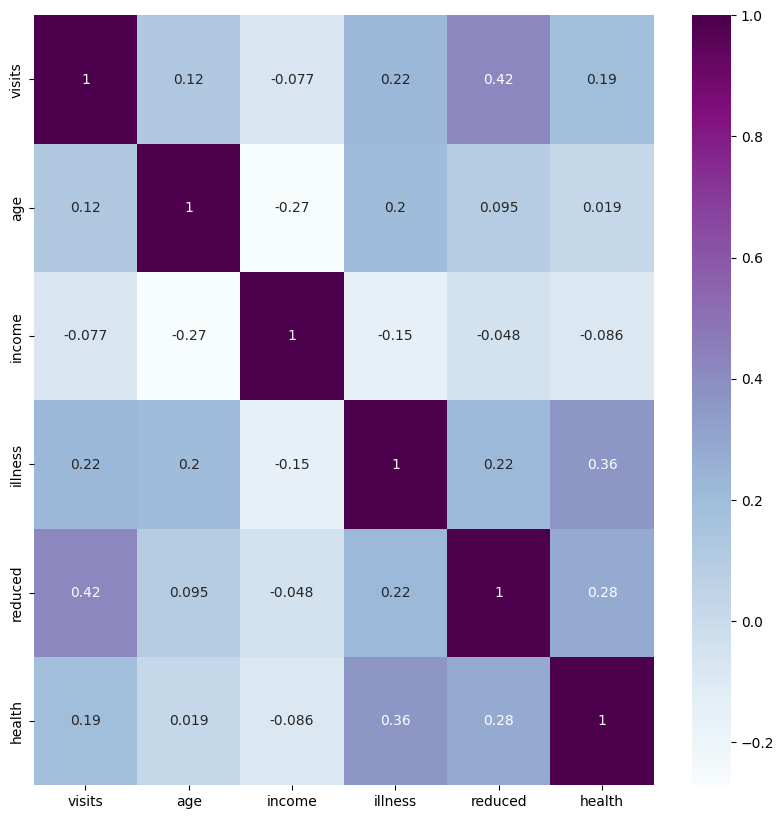

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='BuPu')

- Analyse how the income of a patient affects the no.of visits to the hospital

Text(0, 0.5, 'visits')

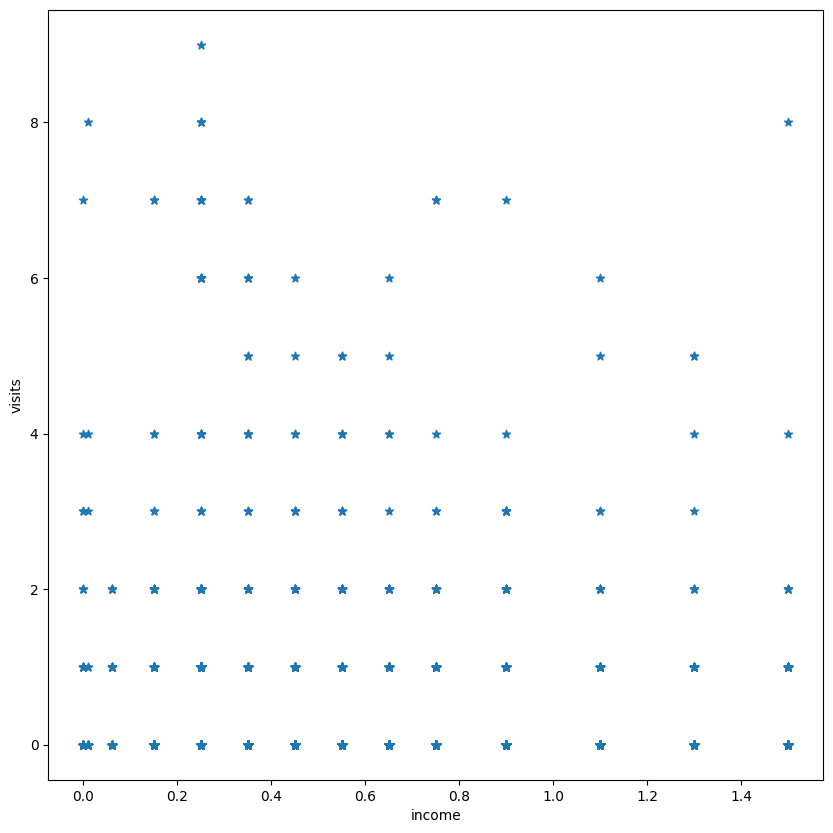

In [19]:
plt.figure(figsize=(10,10))
plt.scatter(x='income',y='visits',data=df,marker='*')
plt.xlabel('income')
plt.ylabel('visits')

- Visualize the percentage of people getting govt health insurance due to low income,due to old age and also the percentage of people having health insurance

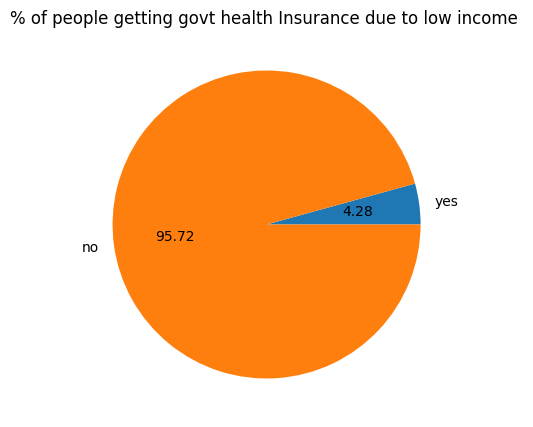

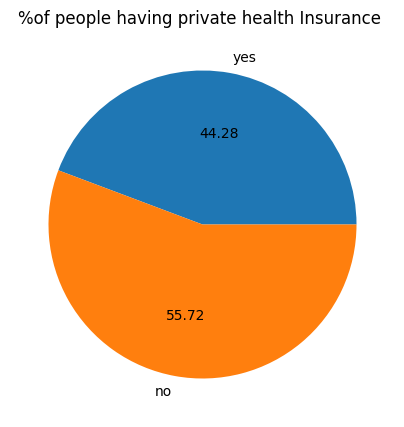

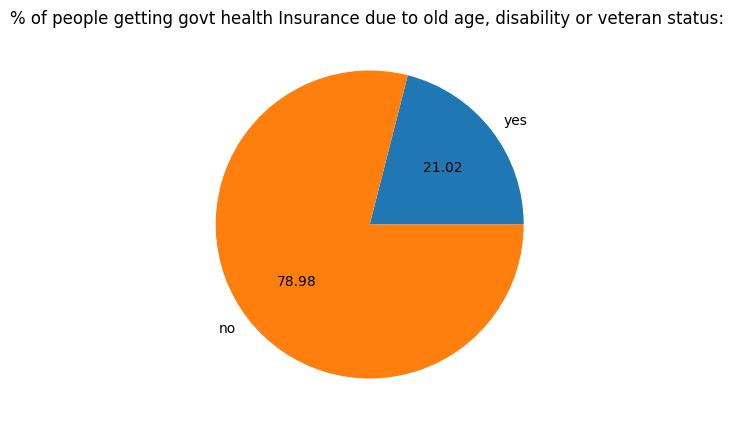

In [20]:
#% of people getting govt Insurance due to Low income

label=['yes', 'no']
Y = df[df['freepoor']=='yes']
N = df[df['freepoor']=='no']
x = [Y.shape[0],N.shape[0]]
plt.figure(figsize=(5,5))
plt.pie(x, labels=label,autopct='%.2f')
plt.title("% of people getting govt health Insurance due to low income ")
plt.show()

# % of people having private Insurance



Y = df[df['private']=='yes']
N=df[df[ 'private']=='no']
x = [Y.shape[0], N.shape[0]]
plt.figure(figsize=(5,5)) 
plt.pie(x, labels=label,autopct='%.2f')
plt.title("%of people having private health Insurance ")
plt.show()

# % of people getting govt Insurance due to old age, disability or veteran status
Y = df [df['freerepat']=='yes']
N = df[df['freerepat']=='no']
x = [Y.shape[0],N.shape[0]]
plt.figure(figsize=(5,5))
plt.pie(x, labels=label,autopct='%.2f')
plt.title("% of people getting govt health Insurance due to old age, disability or veteran status: ")
plt.show()

- Plot a horizontal bar chart to analyze the reduced days of activity due to illness based on Gender

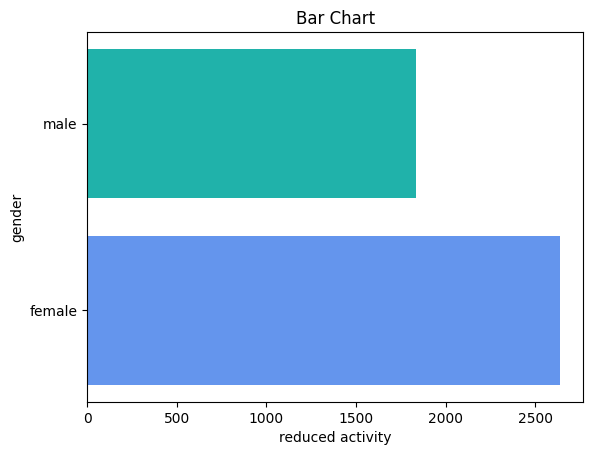

In [21]:
db = df.groupby('gender')['reduced'].sum().to_frame().reset_index()
# creating the bar chart
plt.barh(db['gender'],db['reduced'],color=['cornflowerblue','lightseagreen'])
# Adding the aesthetics
plt.title('Bar Chart')
plt.ylabel('gender')
plt.xlabel('reduced activity')
# show the plot 
plt.show()

- Does the age of patients affect the likelihood of having illnesses?


In [22]:
df['age'].corr(df['illness'])

0.20498389401681044

- How does the presence of chronic illnesses differ between genders?
   

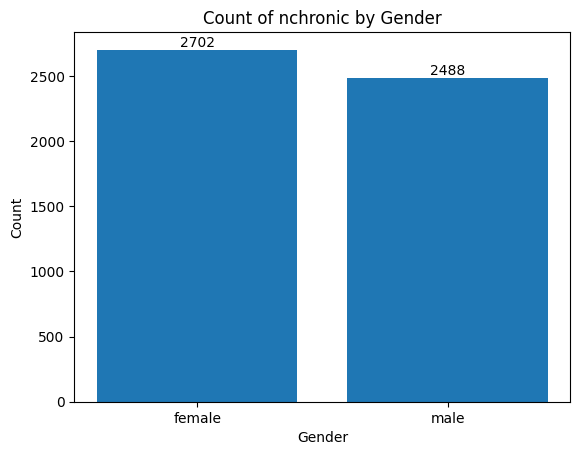

In [23]:
dv  = df.groupby('gender')['nchronic'].count()
plt.bar(dv.index,dv.values)
for i, count in enumerate(dv.values):
    plt.annotate(str(count), (i, count), ha='center', va='bottom')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of nchronic by Gender')
plt.show()